In [152]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, ensemble
from sklearn.metrics import mean_squared_error

In [153]:
data=pd.read_csv('allgws.csv', index_col=False)

In [154]:
data.insert(0, 'playerid', 0)

In [155]:
for i in range(len(data)):
    data['playerid'][i]=data['name'][i].split('_')[2]

c:\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [156]:
for i in range(len(data)):
    if(data['GW'][i]>38):
        data['GW'][i]=data['GW'][i]-9

c:\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [157]:
data.columns

Index(['playerid', 'name', 'assists', 'bonus', 'bps', 'clean_sheets',
       'creativity', 'element', 'fixture', 'goals_conceded', 'goals_scored',
       'ict_index', 'influence', 'kickoff_time', 'minutes', 'opponent_team',
       'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards',
       'round', 'saves', 'selected', 'team_a_score', 'team_h_score', 'threat',
       'total_points', 'transfers_balance', 'transfers_in', 'transfers_out',
       'value', 'was_home', 'yellow_cards', 'GW'],
      dtype='object')

In [158]:
data = data.drop(labels=['bps','bonus','element', 'own_goals','transfers_balance', 'penalties_missed', 'red_cards','penalties_saved','selected','transfers_in', 'transfers_out','kickoff_time', 'fixture'], axis=1)

In [159]:
data[data['GW']==38].name.tolist()

['Aaron_Connolly_534',
 'Aaron_Cresswell_376',
 'Aaron_Lennon_430',
 'Aaron_Mooy_516',
 'Aaron_Ramsdale_494',
 'Aaron_Wan-Bissaka_122',
 'Abd-Al-Ali Morakinyo Olaposi_Koiki_596',
 'Abdoulaye_Doucouré_368',
 'Adalberto_Peñaranda_648',
 'Adama_Traoré_417',
 'Adam_Idah_538',
 'Adam_Lallana_195',
 'Adam_Masina_355',
 'Adam_Smith_63',
 'Adam_Webster_493',
 'Addji Keaninkin Marc-Israel_Guehi_545',
 'Ademola_Lookman_155',
 'Adrian_Mariappa_356',
 'Adrián_San Miguel del Castillo_526',
 'Ahmed_El Mohamady_22',
 'Ainsley_Maitland-Niles_4',
 'Akin_Famewo_552',
 'Albian_Ajeti_514',
 'Alexander_Tettey_289',
 'Alexandre Nascimento_Costa Silva_387',
 'Alexandre_Jankewitz_649',
 'Alexandre_Lacazette_12',
 'Alexis_Mac Allister_627',
 'Alexis_Sánchez_240',
 'Alex_Cochrane_666',
 'Alex_Iwobi_17',
 'Alex_McCarthy_318',
 'Alex_Oxlade-Chamberlain_193',
 'Alfie_Lewis_651',
 'Alfie_Whiteman_543',
 'Alireza_Jahanbakhsh_50',
 'Alisson_Ramses Becker_189',
 'Allan_Saint-Maximin_500',
 'Andreas_Christensen_108',
 

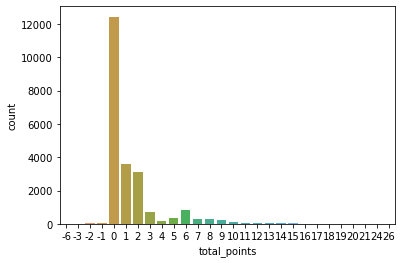

In [160]:
sns.countplot(data['total_points'])

In [161]:
idlist = list(data['playerid'].unique())

# Ignoring players who scored <100pts in the season
### a lower threshold creates problems, ignoring for now

In [162]:
ptsdict = {}
for i in range(669):
    if(data[data['playerid']==i]['total_points'].sum()>100):
        ptsdict[i]=data[data['playerid']==i]['total_points'].sum()

In [163]:
for i in data['playerid']:
    if(i not in ptsdict.keys()):
        data=data[data['playerid']!=i]

In [164]:
playerlist=list(data['playerid'].unique())

In [165]:
for i in playerlist:
    if len(data[data['playerid']==i]) !=39:
        firstgw=data[data['playerid']==i].iloc[0]['round']
        name=data[data['playerid']==i].iloc[0]['name']
        for gw in range(1,firstgw):
            row = {'playerid':i, 'name':name,'assists':0,'clean_sheets':0,'creativity':0,
                   'goals_conceded':0,'goals_scored':0,'ict_index':0,'influence':0,'minutes':0,
                   'opponent_team':0,'round':gw,'saves':0,'team_a_score':0,'team_h_score':0,
                   'threat':0,'total_points':0,'value':0,'was_home':True,'yellow_cards':0,'GW':gw}
            data=data.append(row, ignore_index=True)


In [166]:
idnamedict = {}
for i in sorted(playerlist):
    if(i<=21):
        idnamedict[i]=1
    elif(i>=22 and i<=36):
        idnamedict[i]=2
    elif(i>=37 and i<=57):
        idnamedict[i]=3
    elif(i>=58 and i<=82):
        idnamedict[i]=4
    elif(i>=83 and i<=102):
        idnamedict[i]=5
    elif(i>=103 and i<=121):
        idnamedict[i]=6
    elif(i==122):
        idnamedict[i]=12
    elif(i>=123 and i<=140):
        idnamedict[i]=7
    elif(i>=141 and i<=158):
        idnamedict[i]=8
    elif(i>=159 and i<=180):
        idnamedict[i]=9
    elif(i>=181 and i<=201):
        idnamedict[i]=10
    elif(i>=202 and i<=222):
        idnamedict[i]=11
    elif(i>=223 and i<=250):
        idnamedict[i]=12
    elif(i==265):
        idnamedict[i]=9
    elif(i>=251 and i<=271):
        idnamedict[i]=13
    elif(i>=272 and i<=290):
        idnamedict[i]=14
    elif(i>=291 and i<=303):
        idnamedict[i]=15
    elif(i>=304 and i<=328):
        idnamedict[i]=16
    elif(i>=329 and i<=352):
        idnamedict[i]=17
    elif(i>=353 and i<=375):
        idnamedict[i]=18
    elif(i>=376 and i<=400):
        idnamedict[i]=19
    elif(i>=401 and i<=420):
        idnamedict[i]=20
    elif i == 421 or i == 502 or i == 516 == i==534 or i==493 or i==475:
        idnamedict[i]=4
    elif i==423 or i==471 or i==501:
        idnamedict[i]=15
    elif i==428 or i==445 or i==452 or i==458 or i==470 or i==465:
        idnamedict[i]=2
    elif i==431 or i==432 or i==460 or i==459 or i==463 or i==506:
        idnamedict[i]=6
    elif i==437:
        idnamedict[i]=16
    elif i==448 or i==517:
        idnamedict[i]=9
    elif i==447 or i==451:
        idnamedict[i]=5
    elif i==466 or i==498 or i==500 or i==554:
        idnamedict[i]=13
    elif i==618 or i==549:
        idnamedict[i]=12
    elif i==469 or i==486 or i==541 or i==488:
        idnamedict[i]=1
    elif i==478 or i==511 or i==496:
        idnamedict[i]=8
    elif i==457:
        idnamedict[i]=19
    elif i==494 or i==505:
        idnamedict[i]=3
    elif i==528:
        idnamedict[i]=20
    elif i==468 or i==503:
        idnamedict[i]=7
    elif i==523:
        idnamedict[i]=17
    elif i==525 or i==439:
        idnamedict[i]=18
    elif i==476:
        idnamedict[i]=3
    elif i==443:
        idnamedict[i]=11
    else:
        idnamedict[i]=-1

In [167]:
data.insert(0, 'team', -1)

In [168]:
data['team']=data['playerid']
data['team']=data['team'].map(idnamedict)

In [169]:
data=data.sort_values(by=['GW','playerid'])

In [170]:
teamdict={1:'ARS', 2:'AVL',3:'BOU', 4:'BHA', 5:'BUR', 6:'CHE', 7:'CRY', 8:'EVE', 9:'LEI', 10:'LIV', 11:'MCI', 12:'MUN',
          13:'NEW', 14:'NOR', 15:'SHU', 16:'SOU', 17:'TOT', 18:'WAT', 19:'WHU', 20:'WOL'}
teamfdr={1:3, 2:2,3:2, 4:2, 5:3, 6:4, 7:2, 8:3, 9:3, 10:5, 11:5, 12:4,
          13:2, 14:1, 15:2, 16:3, 17:4, 18:2, 19:2, 20:3}

data['fdr']=data['opponent_team']
data['fdr']=data['fdr'].map(teamfdr)

In [171]:
data['fdr']=data['fdr'].fillna(-1)

In [172]:
data[data['playerid']==618]

,team,playerid,name,assists,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,...,saves,team_a_score,team_h_score,threat,total_points,value,was_home,yellow_cards,GW,fdr
4017,12,618,Bruno Miguel_Borges Fernandes_618,0,0,0.0,0,0,0.0,0.0,...,0,0.0,0.0,0.0,0,0,True,0,1,-1.0
4018,12,618,Bruno Miguel_Borges Fernandes_618,0,0,0.0,0,0,0.0,0.0,...,0,0.0,0.0,0.0,0,0,True,0,2,-1.0
4019,12,618,Bruno Miguel_Borges Fernandes_618,0,0,0.0,0,0,0.0,0.0,...,0,0.0,0.0,0.0,0,0,True,0,3,-1.0
4020,12,618,Bruno Miguel_Borges Fernandes_618,0,0,0.0,0,0,0.0,0.0,...,0,0.0,0.0,0.0,0,0,True,0,4,-1.0
4021,12,618,Bruno Miguel_Borges Fernandes_618,0,0,0.0,0,0,0.0,0.0,...,0,0.0,0.0,0.0,0,0,True,0,5,-1.0
4022,12,618,Bruno Miguel_Borges Fernandes_618,0,0,0.0,0,0,0.0,0.0,...,0,0.0,0.0,0.0,0,0,True,0,6,-1.0
4023,12,618,Bruno Miguel_Borges Fernandes_618,0,0,0.0,0,0,0.0,0.0,...,0,0.0,0.0,0.0,0,0,True,0,7,-1.0
4024,12,618,Bruno Miguel_Borges Fernandes_618,0,0,0.0,0,0,0.0,0.0,...,0,0.0,0.0,0.0,0,0,True,0,8,-1.0
4025,12,618,Bruno Miguel_Borges Fernandes_618,0,0,0.0,0,0,0.0,0.0,...,0,0.0,0.0,0.0,0,0,True,0,9,-1.0
4026,12,618,Bruno Miguel_Borges Fernandes_618,0,0,0.0,0,0,0.0,0.0,...,0,0.0,0.0,0.0,0,0,True,0,10,-1.0


# GW 18-24 LIV-WHU

In [173]:
data24=data[data['GW']==24]
data.drop(data[data['GW']==24].index, inplace=True)

In [174]:
liv=data24.query('opponent_team == 19 and team==10')
data24.drop(data24[(data24['team']==10) & (data24['opponent_team']==19)].index, inplace=True)
liv['GW']=18
whu=data24.query('opponent_team == 10 and team==19')
data24.drop(data24[(data24['team']==19) & (data24['opponent_team']==10)].index, inplace=True)
whu['GW']=18

c:\python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
c:\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [175]:
data=data.append(whu, ignore_index=True)
data=data.append(liv, ignore_index=True)
data=data.append(data24, ignore_index=True)

# GW 30-28 MCI-ARS

In [176]:
data2=data[data['GW']==30]
data.drop(data[data['GW']==30].index, inplace=True)

In [177]:
mci=data2.query('opponent_team == 1 and team==11')
data2.drop(data2[(data2['team']==11) & (data2['opponent_team']==1)].index, inplace=True)
mci['GW']=28
ars=data2.query('opponent_team == 11 and team==1')
data2.drop(data2[(data2['team']==1) & (data2['opponent_team']==11)].index, inplace=True)
ars['GW']=28

c:\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [178]:
data=data.append(ars, ignore_index=True)
data=data.append(mci, ignore_index=True)
data=data.append(data2, ignore_index=True)

# GW 30-28 AVL-SHU

In [179]:
data30=data[data['GW']==30]
data.drop(data[data['GW']==30].index, inplace=True)

In [180]:
shu=data30.query('opponent_team == 2 and team==15')
data30.drop(data30[(data30['team']==15) & (data30['opponent_team']==2)].index, inplace=True)
shu['GW']=28
avl=data30.query('opponent_team == 15 and team==2')
data30.drop(data30[(data30['team']==2) & (data30['opponent_team']==15)].index, inplace=True)
avl['GW']=28

c:\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [181]:
data=data.append(avl, ignore_index=True)
data=data.append(shu, ignore_index=True)
data=data.append(data30, ignore_index=True)

## GW 29 has duplicate MCIvARS

In [182]:
data.drop(data[(data['team']==1) & (data['opponent_team']==11) & (data['GW']==29)].index, inplace=True)
data.drop(data[(data['team']==11) & (data['opponent_team']==1) & (data['GW']==29)].index, inplace=True)

In [183]:
for gw in range(1,39):
    print("GW", gw,len(data[data['GW']==gw]))

GW 1 106
GW 2 106
GW 3 106
GW 4 106
GW 5 106
GW 6 106
GW 7 106
GW 8 106
GW 9 106
GW 10 106
GW 11 106
GW 12 106
GW 13 106
GW 14 106
GW 15 106
GW 16 106
GW 17 106
GW 18 106
GW 19 106
GW 20 106
GW 21 106
GW 22 106
GW 23 106
GW 24 106
GW 25 106
GW 26 106
GW 27 106
GW 28 106
GW 29 106
GW 30 106
GW 31 106
GW 32 106
GW 33 106
GW 34 106
GW 35 106
GW 36 106
GW 37 106
GW 38 106


In [184]:
data=data.sort_values(by=['GW','playerid'])

In [185]:
data.to_csv("datacleaned.csv")

In [189]:
data[data['playerid']==11]

,team,playerid,name,assists,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,...,saves,team_a_score,team_h_score,threat,total_points,value,was_home,yellow_cards,GW,fdr
0,1,11,Pierre-Emerick_Aubameyang_11,0,1,6.5,0,1,12.2,37.4,...,0,1.0,0.0,78.0,6,110,False,0,1,2.0
106,1,11,Pierre-Emerick_Aubameyang_11,0,0,18.9,1,1,9.4,42.2,...,0,1.0,2.0,33.0,6,110,True,1,2,3.0
212,1,11,Pierre-Emerick_Aubameyang_11,1,0,25.3,3,0,5.5,7.0,...,0,1.0,3.0,23.0,5,110,False,0,3,5.0
318,1,11,Pierre-Emerick_Aubameyang_11,0,0,26.6,2,1,12.7,47.8,...,0,2.0,2.0,53.0,9,110,True,0,4,4.0
424,1,11,Pierre-Emerick_Aubameyang_11,0,0,2.2,2,2,11.5,69.2,...,0,2.0,2.0,44.0,13,110,False,0,5,2.0
530,1,11,Pierre-Emerick_Aubameyang_11,0,0,1.6,2,1,9.5,34.6,...,0,2.0,3.0,59.0,5,110,True,1,6,2.0
636,1,11,Pierre-Emerick_Aubameyang_11,0,0,25.7,1,1,8.7,42.2,...,0,1.0,1.0,19.0,9,110,False,0,7,4.0
742,1,11,Pierre-Emerick_Aubameyang_11,0,1,12.8,0,0,6.1,1.0,...,0,0.0,1.0,47.0,2,110,True,0,8,2.0
848,1,11,Pierre-Emerick_Aubameyang_11,0,0,4.7,1,0,1.6,3.6,...,0,0.0,1.0,8.0,2,111,False,0,9,2.0
954,1,11,Pierre-Emerick_Aubameyang_11,0,0,12.4,2,0,2.4,1.0,...,0,2.0,2.0,11.0,2,111,True,0,10,2.0


In [ ]:
for gw in range(5,34):
    for i in playerlist:
        x=data[data['GW']==gw]
        row=x[x['playerid']==i]
        row['form']=1

In [ ]:
avgs = {}
gwrange = [1,2,3,4,5]
for i in playerlist:
    scorelist=[]
    for g in gwrange:
        temp=data[data['GW']==g]
        temp=temp[temp['playerid']==i]
        scorelist.append(int(temp['total_points']))
    avgs[i]=calcRollingAvg(scorelist)

# Train model

In [ ]:
train=data[data['playerid']==191]

In [ ]:
ytrain=train['total_points']

In [ ]:
del train['total_points']
xtrain=train

In [ ]:
xtest=xtrain.tail(5)
ytest=ytrain.tail(5)

In [ ]:
xtrain=xtrain[:-5]
ytrain=ytrain[:-5]

In [ ]:
reg = ensemble.RandomForestRegressor()
reg.fit(xtrain[feature_cols], ytrain)

mse = mean_squared_error(ytest, reg.predict(xtest[feature_cols]))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

In [ ]:
plt.plot(reg.feature_importances_, feature_cols)

In [ ]:
xtest

In [ ]:
reg.predict(xtest[0])

In [ ]:
sorted(data[data['GW']==29].name.tolist())

In [ ]:
data[data['GW']==28]

In [ ]:
for x in range(20):
    print(data[(data['GW']==29)& (data['team']==x)])